<a href="https://colab.research.google.com/github/ArthurMarchiDS/Portfolio/blob/master/An%C3%A1lise_Turbina_E%C3%B3lica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Turbina Eólica**

---

Nas turbinas de vento, o sistema SCADA, sigla em inglês para *Controle de supervisão e aquisição de dados* em tradução livre, mede e salva dados como velocidade do vento, direção do vento, poder gerado pela turbina a cada 10 minutos, entre outros dados.

Os dados do Dataset em análise foram retirados de uma turbina de vento em funcionamento atualmente na Turquia.

# **O Dataset**
---
O Dataset em questão é composto pelas seguintes colunas.

*   Date/Time - Data e hora em intervalos de 10 minutos
*   LV ActivePower (kW) - A quantidade de energia gerada pela turbina
*   Wind Speed (m/s) - Velocidade do vento
*   TheoreticalPowerCurve (KWh) - Os valores potenciais fornecidos pelo fabricante
*   Wind Direction (°) - A direção do vento, levando em conta que esse modelo de turbina muda a direção automaticamente.



#**Upload do Arquivo**
---
Para quem possa interessar em reproduzir a análise realizada, o Dataset foi retirado do Kaggle.

[Kaggle](https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset)

#**Bibliotecas**
---

In [1]:
#Importando todas as bibliotecas necessárias para a análise

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
#Carregando o arquivo

turbina = pd.read_csv('T1.csv')


# **Análise dos Dados**
---

Antes de iniciar qualquer análise, vamos visualizar o nosso dataset, analisando as 5 primeiras entradas.

In [3]:
turbina.head()  # Traz os primeiros registros - Apenas para visualizarmos como está o Dataset

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
display(turbina.dtypes) # Com isso podemos ver os tipos de dados que cada coluna possui, Datahora(DateTime64) e Ponto Flutuante(float64).

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [5]:
turbina.shape[0]
turbina.shape[1]

print('Linhas:\t{}'.format(turbina.shape[0]), '\nColunas:\t{}' .format(turbina.shape[1]))

#Aqui vemos a quantidade de registros no Dataset

Linhas:	50530 
Colunas:	5


In [6]:
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)','Direção do Vento(°)'] #Alteração de nome de algumas colunas para facilitar o entendimento
del turbina['Direção do Vento(°)'] # Retirada da coluna Direção vento pois não será utilizada
turbina['Data/hora']= pd.to_datetime(turbina['Data/hora'])
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


In [7]:
turbina.shape[0]
turbina.shape[1]

print('Linhas:\t{}'.format(turbina.shape[0]), '\nColunas:\t{}' .format(turbina.shape[1]))

#Novamente o mesmo código apenas para ilustrar que realmente foi retirado uma coluna do Dataset

Linhas:	50530 
Colunas:	4


#**Hora dos Gráficos**
---

Para facilitar o entendimento de como os dados estão distribuídos.

Lembra que no início na parte onde foram detalhados os itens do Dataset, foi citado que havia uma coluna chamada de 'TheoreticalPowerCurve (KWh)', onde apresenta os valores potenciais fornecidos pelo fabricante.

Pois bem, serão analisados dois gráficos, um com os dados do fabricante e outro com os dados reais da turbina, para assim podermos comparar o real desempenho.

#**Gráfico - Desempenho Real**
---

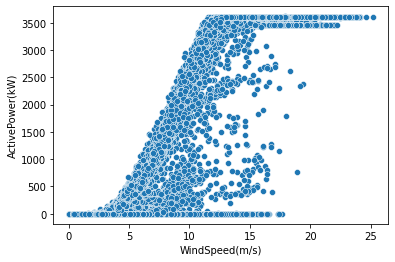

In [9]:
#Nesse caso foi utilizado a coluna WindSpeed no eixo x e a coluna ActivePower no eixo y.

sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)')

#**Gráfico - Desempenho Ideal**
---

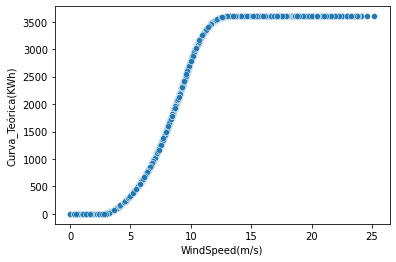

In [10]:
sns.scatterplot (data=turbina, x='WindSpeed(m/s)', y='Curva_Teórica(KWh)')

O gráfico acima, onde demonstra os dados potenciais fornecidos pelo fabricante nem sempre se reflete na realidade dentro das condições de uso do equipamento.

De cara, apenas olhando os dois gráficos podemos perceber que no gráfico real existem muitos valores que estão fora do ideal.

#**Definindo Limites**

In [12]:
POWERreal = turbina['ActivePower(kW)'].tolist()       #Criada uma variável e nela convertemos os valores da coluna Active Power em uma lista
POWERteorica = turbina['Curva_Teórica(KWh)'].tolist() #Criada variável e nela convertemos os valores da coluna Curva Teórica em lista

PWRmax=[]
PWRmin=[]
PWRdentro=[]  #Foram criadas 3 listas onde serão armazenados os valores máximo, minímo e os valores que estão dentro das especificações

#Aqui foi estabelecido o paramêtro para esses dados, bem como o limite aceitável em relação aos valores apresentados
for potencia in POWERteorica:
  PWRmax.append(potencia*1.05)
  PWRmin.append(potencia*0.95)

for p, potencia in enumerate(POWERreal):
  if potencia>=PWRmin[p] and potencia<=PWRmax[p]:
    PWRdentro.append('Dentro')
  elif potencia==0:
    PWRdentro.append('Zero')
  else:
    PWRdentro.append('Fora')    
  

#**Adicionando lista ao Dataset**
---

No código acima, foram criadas 3 listas, onde foram armazenados os valores máximos e mínimos e também uma lista onde foram armazenados os valores que correspondem aos valores ideais fornecidos pelo fabricante.

In [13]:
turbina['DentroLimite'] = PWRdentro

print(turbina)

                Data/hora  ActivePower(kW)  ...  Curva_Teórica(KWh)  DentroLimite
0     2018-01-01 00:00:00       380.047791  ...          416.328908          Fora
1     2018-01-01 00:10:00       453.769196  ...          519.917511          Fora
2     2018-01-01 00:20:00       306.376587  ...          390.900016          Fora
3     2018-01-01 00:30:00       419.645905  ...          516.127569          Fora
4     2018-01-01 00:40:00       380.650696  ...          491.702972          Fora
...                   ...              ...  ...                 ...           ...
50525 2018-12-31 23:10:00      2963.980957  ...         3397.190793          Fora
50526 2018-12-31 23:20:00      1684.353027  ...         1173.055771          Fora
50527 2018-12-31 23:30:00      2201.106934  ...         1788.284755          Fora
50528 2018-12-31 23:40:00      2515.694092  ...         2418.382503        Dentro
50529 2018-12-31 23:50:00      2820.466064  ...         2779.184096        Dentro

[50530 rows x 5

E podemos ver que a lista com os valores foram devidamente adicionadas ao Dataset como uma nova coluna.

Agora temos todos os valores e indicadores necessários para a análise completa da turbina.

Temos os valores ideais fornecidos pelo fabricante, temos uma categorização dos valores de funcionamento reais da turbina em operação e podemos finalmente confrontar os dois tipos de dados.

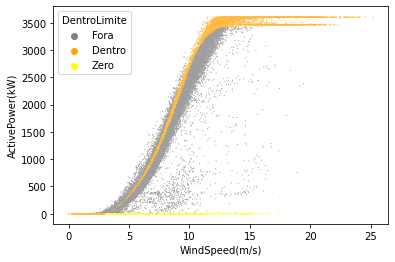

In [33]:
cor={'Dentro':'orange','Fora':'gray','Zero':'yellow'}
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)', hue='DentroLimite', s=1, palette=cor)


#**Conclusão**
---

Foi realizada uma análise dos dados do sistema SCADA de uma turbina atualmente em funcionamento na Turquia.

A análise foi realizada utilizando os dados de energia que a turbina gera em relação à velocidade do vento.

O fabricante forneceu os dados de energia ideal gerada pela turbina, ou seja, em condições ideais de funcionamento.

Tais dados foram utilizados como parâmetro ao analisar os dados da turbina em funcionamento.

Podemos notar que os dados reais obtidos pela turbina nos mostra muita variação ao longo de seu funcionamento, sendo necessário mais dados para que possamos entender os reais motivos de divergência.

